In [110]:
import statsmodels.api as sm
import pandas as pd
import matplotlib
import numpy as np

In [111]:
data_2 = pd.read_csv('problem2.csv')
data_2.head()

,x,y
0,-1.614399,-1.695691
1,-0.900999,0.409843
2,-0.170662,1.043979
3,2.097252,2.708814
4,0.140208,0.052374


In [112]:
X = data_2['x']
y = data_2['y']
model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              23.69
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                    4.28e-06
Time:                        23:34:19   Log-Likelihood:                         -160.49
No. Observations:                 100   AIC:                                      323.0
Df Residuals:                      99   BIC:                                      325.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/var/folders/84/_nb6p8gs52vbj2zb1fpgrm2h0000gn/T/ipykernel_74510/2256992733.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  error_sum = np.sum(abs(x) for x in error_vector)


94.28287419588395

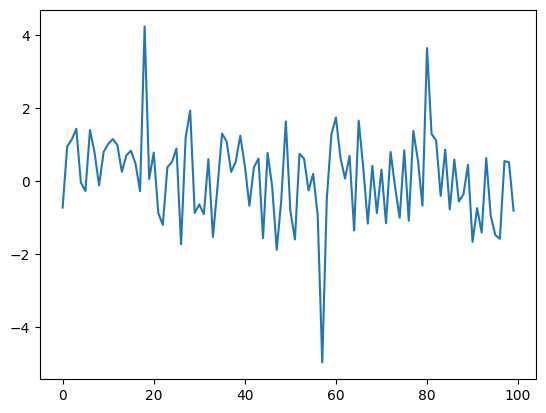

In [113]:
error_vector = model.resid
error_vector.plot()
error_sum = np.sum(abs(x) for x in error_vector)
error_sum

In [117]:
y_hat = model.predict(X)
residuals = y - y_hat
print(residuals)
#MSE
n = len(data_2)
mse = (1/n) * np.sum(residuals ** 2)
print("MSE:", mse)

0    -0.718671
1     0.955120
2     1.147262
3     1.439575
4    -0.032478
        ...   
95   -1.470443
96   -1.575020
97    0.554699
98    0.522090
99   -0.802468
Length: 100, dtype: float64
MSE: 1.4505091997840902


In [115]:
import numpy as np
from scipy.stats import t


def log_likelihood(residuals, mu, sigma):
    n = len(residuals)
    ll = -n/2*np.log(2*np.pi) - n*np.log(sigma) - 1/(2*sigma**2)*np.sum((residuals-mu)**2)
    return ll

mu = np.mean(error_vector)
sigma = np.std(error_vector)
params = [mu, sigma]
ll = log_likelihood(error_vector,mu,sigma)
print(ll)

def log_likelihood_t(params, residuals):
    df = len(residuals) - 1
    loglik = np.sum(t.logpdf(residuals, df, mu, sigma))
    return loglik

params = [mu, sigma]
loglik = log_likelihood_t(params,error_vector)
print(loglik)

-159.99209669526914
-159.29721858186196


In [104]:
error_vector

0    -0.718671
1     0.955120
2     1.147262
3     1.439575
4    -0.032478
        ...   
95   -1.470443
96   -1.575020
97    0.554699
98    0.522090
99   -0.802468
Length: 100, dtype: float64